# **Machine Learning**

## Objectives

- Build supervised machine learning models to predict whether an individual has cardiovascular disease based on their demographic, clinical, and lifestyle features.

## Inputs

- Processed dataset from the EDA step

## Outputs

- Generate classification reports for ml models.
- Plot key visuals to show performance of rf models



---

# Change working directory

Change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/analysis-of-risk-factors-for-cardiovascular-diseases/jupyter_notebooks'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/analysis-of-risk-factors-for-cardiovascular-diseases'

---

# Initial Setup

Import libaries for machine learning.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay


Extract dataset

In [5]:
df = pd.read_csv('data/processed/processed_heart_data.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pp,bmi,age_years
0,0,18393,Female,168,62.0,110,80,Normal,Normal,Non-smoker,Non-drinker,Active,No CVD,30,21.97,50
1,1,20228,Male,156,85.0,140,90,Very high,Normal,Non-smoker,Non-drinker,Active,CVD,50,34.93,55
2,2,18857,Male,165,64.0,130,70,Very high,Normal,Non-smoker,Non-drinker,Inactive,CVD,60,23.51,52
3,3,17623,Female,169,82.0,150,100,Normal,Normal,Non-smoker,Non-drinker,Active,CVD,50,28.71,48
4,4,17474,Male,156,56.0,100,60,Normal,Normal,Non-smoker,Non-drinker,Inactive,No CVD,40,23.01,48


Set seaborn theme

In [6]:
'''Set seaborn theme for all plots'''
sns.set_theme(style="whitegrid", palette="colorblind")

---

# Machine Learning: Logistic Regression

## Features and target

Target for this model is `cardio`.

In [7]:
'''Select target'''
X = df.drop(columns=['id', 'cardio'])
y = df['cardio']

In [8]:
'''Select features'''
numeric_features = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'pp']
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

## Preprocessing pipeline: Scaling and encoding
Create pipeline to scale numerical features and encode catagorical features.

In [9]:
''' Scaling and encoding '''
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Train test split
Split dataset into training and testing sets.

In [10]:
''' Train test split '''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

## Modeling and evaluation

Create and train logistic regression model, then evaluate the model.

In [11]:
'''Modeling'''
log_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        solver='liblinear',))
])

In [12]:
'''Training'''
log_reg_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age_years', 'height',
                                                   'weight', 'ap_hi', 'ap_lo',
                                                   'bmi', 'pp']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['gender', 'cholesterol',
                                                   'gluc', 'smoke', 'alco',
                                                   'active'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    solver='liblinear'))])

In [13]:
''' Evaluation'''
# Predictions
y_pred = log_reg_model.predict(X_test)
y_prob = log_reg_model.predict_proba(X_test)[:, 1]

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
               precision    recall  f1-score   support

         CVD       0.76      0.67      0.71      6789
      No CVD       0.71      0.79      0.75      6934

    accuracy                           0.73     13723
   macro avg       0.73      0.73      0.73     13723
weighted avg       0.73      0.73      0.73     13723

ROC-AUC Score: 0.7918569006353828


Report shows a strong model with a fairly high ROC-AUC score.

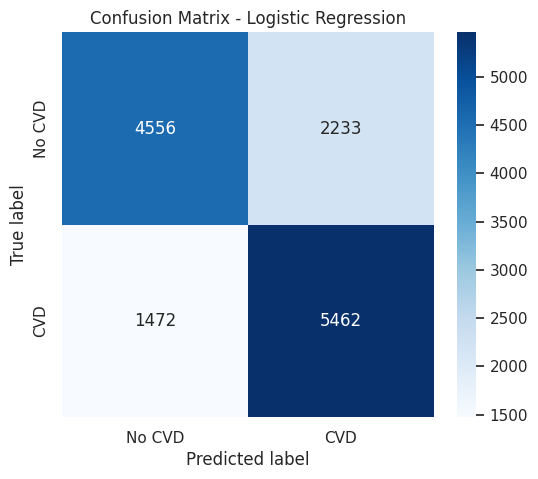

In [14]:
''' Confusion Matrix '''
cm = confusion_matrix(y_test, y_pred)
labels = ['No CVD', 'CVD']

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Confusion matrix shows high true positives and true negatives.

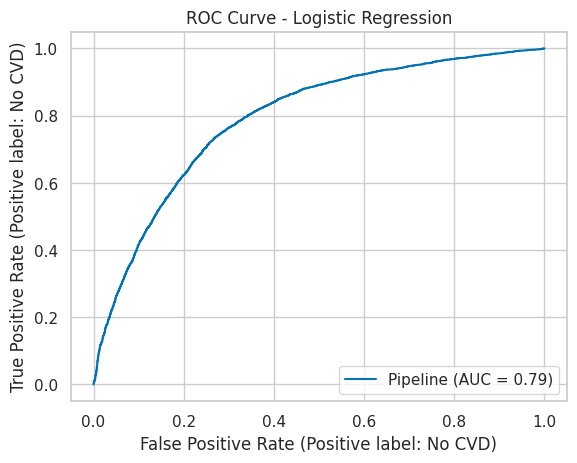

In [15]:
''' ROC Curve '''
RocCurveDisplay.from_estimator(log_reg_model, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

Achieved an ROC-AUC score of 0.79, indicating good discriminatory ability. This suggests the model can correctly distinguish between individuals with and without cardiovascular disease approximately 79% of the time.

---

# Machine Learning: Random Forest
Create and train random forest model, then evaluate the model. Same features, target, preprocessing pipelines and train/test set used as logistic regression model.

## Modeling and evaluating

In [16]:
''' Modeling '''
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators= 200,
        random_state= 123,
        class_weight= 'balanced',
        n_jobs= -1
    ))
])

In [17]:
'''Training'''
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age_years', 'height',
                                                   'weight', 'ap_hi', 'ap_lo',
                                                   'bmi', 'pp']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['gender', 'cholesterol',
                                                   'gluc', 'smoke', 'alco',
                                                   'active'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, n_jobs=-1,
                                        random_state=123))])

In [19]:
''' Evaluation'''
# Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

Classification Report:
               precision    recall  f1-score   support

         CVD       0.71      0.69      0.70      6789
      No CVD       0.70      0.72      0.71      6934

    accuracy                           0.71     13723
   macro avg       0.71      0.71      0.71     13723
weighted avg       0.71      0.71      0.71     13723

ROC-AUC Score: 0.7665259739335544


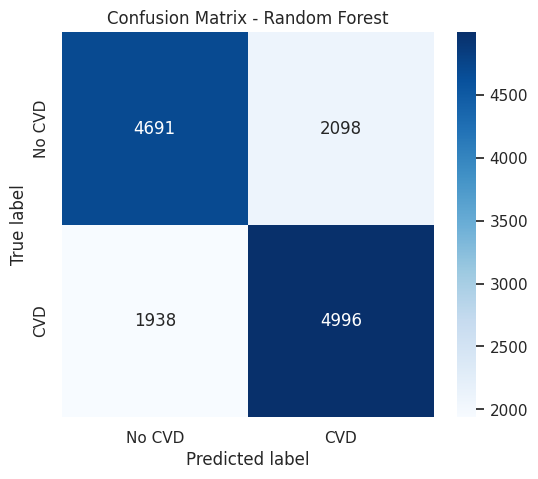

In [20]:
''' Confusion Matrix '''
cm = confusion_matrix(y_test, y_pred_rf)
labels = ['No CVD', 'CVD']

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

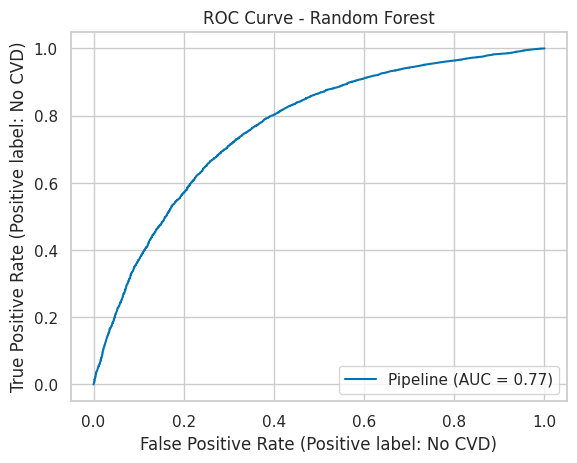

In [21]:
''' ROC Curve '''
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()

Achieved an ROC-AUC score of 0.77, indicating good discriminatory ability. This suggests the model can correctly distinguish between individuals with and without cardiovascular disease approximately 77% of the time. Lower ROC-AUC score compared to the logistic regression model.

---

# Conclusion

Two supervised models, logistic regression and random forest, were trained to predict cardiovascular disease (CVD). Both models uses the same features, target, train test data and preprocessing pipelines.